### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

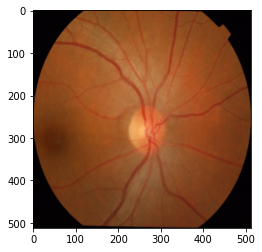

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
value_channel_train = convert_to_hsv(2, img_train)
len(value_channel_train)

50

### Test images

In [5]:
value_channel_test = convert_to_hsv(2, img_test)
len(value_channel_test)

51

#### Generator of augmented data:

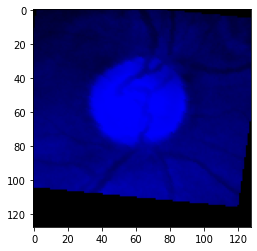

In [6]:
gen = data_generator(value_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


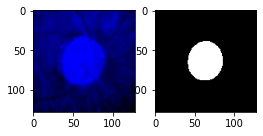

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(value_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(value_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_value', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 62s 486ms/step - loss: 1.5385 - mean_IOU_gpu: 0.0631 - dice_metric: 0.1178 - val_loss: 1.4693 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 46s 467ms/step - loss: 1.4639 - mean_IOU_gpu: 0.0997 - dice_metric: 0.1806 - val_loss: 1.4096 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 46s 460ms/step - loss: 1.5995 - mean_IOU_gpu: 0.0693 - dice_metric: 0.1287 - val_loss: 1.3505 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 47s 470ms/step - loss: 1.4927 - mean_IOU_gpu: 0.0781 - dice_metric: 0.1437 - val_loss: 1.2528 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 46s 464ms/step - loss: 1.2889 - mean_IOU_gpu: 0.2425 - dice_metric: 0.3818 - val_loss: 1.1209 - val_mean_IOU_gpu: 0

Epoch 41/500
99/99 [==============================] - 46s 467ms/step - loss: 0.3131 - mean_IOU_gpu: 0.5876 - dice_metric: 0.7150 - val_loss: 2.1552 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 46s 462ms/step - loss: 0.2615 - mean_IOU_gpu: 0.6278 - dice_metric: 0.7519 - val_loss: 0.5640 - val_mean_IOU_gpu: 0.3633 - val_dice_metric: 0.5150
Epoch 43/500
99/99 [==============================] - 46s 469ms/step - loss: 0.2292 - mean_IOU_gpu: 0.6461 - dice_metric: 0.7714 - val_loss: 2.5829 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 44/500
99/99 [==============================] - 46s 470ms/step - loss: 0.2417 - mean_IOU_gpu: 0.6445 - dice_metric: 0.7673 - val_loss: 2.3499 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 45/500
99/99 [==============================] - 45s 457ms/step - loss: 0.2502 - mean_IOU_gpu: 0.6346 - dice_metric: 0.7590 - val_loss: 0.5498 - val_mean_IOU_gpu: 0.37

99/99 [==============================] - 46s 461ms/step - loss: 0.1890 - mean_IOU_gpu: 0.6859 - dice_metric: 0.8022 - val_loss: 0.8081 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 82/500
99/99 [==============================] - 46s 466ms/step - loss: 0.2283 - mean_IOU_gpu: 0.6488 - dice_metric: 0.7717 - val_loss: 1.0799 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 83/500
99/99 [==============================] - 45s 455ms/step - loss: 0.2029 - mean_IOU_gpu: 0.6625 - dice_metric: 0.7854 - val_loss: 0.8334 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 84/500
99/99 [==============================] - 46s 466ms/step - loss: 0.2086 - mean_IOU_gpu: 0.6622 - dice_metric: 0.7836 - val_loss: 0.7502 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 85/500
99/99 [==============================] - 46s 463ms/step - loss: 0.1885 - mean_IOU_gpu: 0.6780 - dice_metric: 0.7977 - val_loss: 1.0252 - val_mean_IOU_gpu: 0.0000e+0

Epoch 121/500
99/99 [==============================] - 46s 468ms/step - loss: 0.1602 - mean_IOU_gpu: 0.7221 - dice_metric: 0.8282 - val_loss: 0.8296 - val_mean_IOU_gpu: 0.0642 - val_dice_metric: 0.1069
Epoch 122/500
99/99 [==============================] - 47s 471ms/step - loss: 0.1623 - mean_IOU_gpu: 0.7097 - dice_metric: 0.8206 - val_loss: 0.8788 - val_mean_IOU_gpu: 0.0296 - val_dice_metric: 0.0515
Epoch 123/500
99/99 [==============================] - 48s 481ms/step - loss: 0.1609 - mean_IOU_gpu: 0.7061 - dice_metric: 0.8203 - val_loss: 0.5511 - val_mean_IOU_gpu: 0.2464 - val_dice_metric: 0.3445
Epoch 124/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1817 - mean_IOU_gpu: 0.6699 - dice_metric: 0.7945 - val_loss: 0.6221 - val_mean_IOU_gpu: 0.1848 - val_dice_metric: 0.2721
Epoch 125/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1536 - mean_IOU_gpu: 0.7137 - dice_metric: 0.8262 - val_loss: 0.9383 - val_mean_IOU_gpu: 0.0058 - val_dice_metri

99/99 [==============================] - 47s 471ms/step - loss: 0.1800 - mean_IOU_gpu: 0.6925 - dice_metric: 0.8067 - val_loss: 0.1838 - val_mean_IOU_gpu: 0.6776 - val_dice_metric: 0.7803
Epoch 162/500
99/99 [==============================] - 46s 466ms/step - loss: 0.1397 - mean_IOU_gpu: 0.7332 - dice_metric: 0.8384 - val_loss: 0.2198 - val_mean_IOU_gpu: 0.6402 - val_dice_metric: 0.7440
Epoch 163/500
99/99 [==============================] - 47s 472ms/step - loss: 0.1477 - mean_IOU_gpu: 0.7204 - dice_metric: 0.8301 - val_loss: 0.6292 - val_mean_IOU_gpu: 0.2313 - val_dice_metric: 0.3135
Epoch 164/500
99/99 [==============================] - 45s 459ms/step - loss: 0.1804 - mean_IOU_gpu: 0.6979 - dice_metric: 0.8102 - val_loss: 0.3711 - val_mean_IOU_gpu: 0.5114 - val_dice_metric: 0.6193
Epoch 165/500
99/99 [==============================] - 47s 470ms/step - loss: 0.1722 - mean_IOU_gpu: 0.7013 - dice_metric: 0.8133 - val_loss: 0.2512 - val_mean_IOU_gpu: 0.6128 - val_dice_metric: 0.7270
Epoc

Epoch 202/500
99/99 [==============================] - 48s 484ms/step - loss: 0.1608 - mean_IOU_gpu: 0.7108 - dice_metric: 0.8212 - val_loss: 0.2252 - val_mean_IOU_gpu: 0.6457 - val_dice_metric: 0.7490
Epoch 203/500
99/99 [==============================] - 47s 474ms/step - loss: 0.1483 - mean_IOU_gpu: 0.7227 - dice_metric: 0.8305 - val_loss: 0.2842 - val_mean_IOU_gpu: 0.5806 - val_dice_metric: 0.6909
Epoch 204/500
99/99 [==============================] - 48s 481ms/step - loss: 0.1588 - mean_IOU_gpu: 0.7039 - dice_metric: 0.8183 - val_loss: 0.3374 - val_mean_IOU_gpu: 0.5330 - val_dice_metric: 0.6356
Epoch 205/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1512 - mean_IOU_gpu: 0.7275 - dice_metric: 0.8326 - val_loss: 0.1960 - val_mean_IOU_gpu: 0.6668 - val_dice_metric: 0.7745
Epoch 206/500
99/99 [==============================] - 47s 474ms/step - loss: 0.1623 - mean_IOU_gpu: 0.7058 - dice_metric: 0.8186 - val_loss: 0.2941 - val_mean_IOU_gpu: 0.5706 - val_dice_metri

99/99 [==============================] - 47s 472ms/step - loss: 0.1416 - mean_IOU_gpu: 0.7427 - dice_metric: 0.8426 - val_loss: 0.1815 - val_mean_IOU_gpu: 0.6798 - val_dice_metric: 0.7808
Epoch 243/500
99/99 [==============================] - 47s 480ms/step - loss: 0.1553 - mean_IOU_gpu: 0.7219 - dice_metric: 0.8273 - val_loss: 0.1917 - val_mean_IOU_gpu: 0.6685 - val_dice_metric: 0.7727
Epoch 244/500
99/99 [==============================] - 47s 478ms/step - loss: 0.1441 - mean_IOU_gpu: 0.7311 - dice_metric: 0.8361 - val_loss: 0.1947 - val_mean_IOU_gpu: 0.6677 - val_dice_metric: 0.7703
Epoch 245/500
99/99 [==============================] - 47s 475ms/step - loss: 0.1431 - mean_IOU_gpu: 0.7335 - dice_metric: 0.8381 - val_loss: 0.2296 - val_mean_IOU_gpu: 0.6356 - val_dice_metric: 0.7408
Epoch 246/500
99/99 [==============================] - 47s 479ms/step - loss: 0.1469 - mean_IOU_gpu: 0.7285 - dice_metric: 0.8345 - val_loss: 0.2024 - val_mean_IOU_gpu: 0.6611 - val_dice_metric: 0.7643
Epoc

Epoch 283/500
99/99 [==============================] - 48s 480ms/step - loss: 0.1244 - mean_IOU_gpu: 0.7436 - dice_metric: 0.8489 - val_loss: 0.2364 - val_mean_IOU_gpu: 0.6312 - val_dice_metric: 0.7363
Epoch 284/500
99/99 [==============================] - 48s 483ms/step - loss: 0.1642 - mean_IOU_gpu: 0.7212 - dice_metric: 0.8254 - val_loss: 0.1938 - val_mean_IOU_gpu: 0.6729 - val_dice_metric: 0.7723
Epoch 285/500
99/99 [==============================] - 48s 481ms/step - loss: 0.1596 - mean_IOU_gpu: 0.7098 - dice_metric: 0.8213 - val_loss: 0.1771 - val_mean_IOU_gpu: 0.6861 - val_dice_metric: 0.7841
Epoch 286/500
99/99 [==============================] - 47s 475ms/step - loss: 0.1407 - mean_IOU_gpu: 0.7352 - dice_metric: 0.8386 - val_loss: 0.1798 - val_mean_IOU_gpu: 0.6833 - val_dice_metric: 0.7839
Epoch 287/500
99/99 [==============================] - 47s 475ms/step - loss: 0.1425 - mean_IOU_gpu: 0.7401 - dice_metric: 0.8416 - val_loss: 0.2295 - val_mean_IOU_gpu: 0.6359 - val_dice_metri

99/99 [==============================] - 37s 378ms/step - loss: 0.1612 - mean_IOU_gpu: 0.7167 - dice_metric: 0.8248 - val_loss: 0.1581 - val_mean_IOU_gpu: 0.7014 - val_dice_metric: 0.8058
Epoch 324/500
99/99 [==============================] - 47s 477ms/step - loss: 0.1196 - mean_IOU_gpu: 0.7613 - dice_metric: 0.8587 - val_loss: 0.1690 - val_mean_IOU_gpu: 0.6859 - val_dice_metric: 0.7910
Epoch 325/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1343 - mean_IOU_gpu: 0.7478 - dice_metric: 0.8483 - val_loss: 0.2199 - val_mean_IOU_gpu: 0.6396 - val_dice_metric: 0.7448
Epoch 326/500
99/99 [==============================] - 47s 478ms/step - loss: 0.1526 - mean_IOU_gpu: 0.7195 - dice_metric: 0.8283 - val_loss: 0.1766 - val_mean_IOU_gpu: 0.6857 - val_dice_metric: 0.7858
Epoch 327/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1378 - mean_IOU_gpu: 0.7380 - dice_metric: 0.8414 - val_loss: 0.2203 - val_mean_IOU_gpu: 0.6365 - val_dice_metric: 0.7424
Epoc

Epoch 364/500
99/99 [==============================] - 47s 474ms/step - loss: 0.1472 - mean_IOU_gpu: 0.7302 - dice_metric: 0.8346 - val_loss: 0.1999 - val_mean_IOU_gpu: 0.6617 - val_dice_metric: 0.7643
Epoch 365/500
99/99 [==============================] - 46s 468ms/step - loss: 0.1481 - mean_IOU_gpu: 0.7308 - dice_metric: 0.8347 - val_loss: 0.1646 - val_mean_IOU_gpu: 0.6935 - val_dice_metric: 0.7937
Epoch 366/500
99/99 [==============================] - 46s 468ms/step - loss: 0.1349 - mean_IOU_gpu: 0.7453 - dice_metric: 0.8463 - val_loss: 0.1976 - val_mean_IOU_gpu: 0.6690 - val_dice_metric: 0.7695
Epoch 367/500
99/99 [==============================] - 47s 474ms/step - loss: 0.1438 - mean_IOU_gpu: 0.7409 - dice_metric: 0.8416 - val_loss: 0.1982 - val_mean_IOU_gpu: 0.6625 - val_dice_metric: 0.7687
Epoch 368/500
99/99 [==============================] - 47s 471ms/step - loss: 0.1438 - mean_IOU_gpu: 0.7352 - dice_metric: 0.8383 - val_loss: 0.1571 - val_mean_IOU_gpu: 0.7079 - val_dice_metri

99/99 [==============================] - 47s 476ms/step - loss: 0.1481 - mean_IOU_gpu: 0.7218 - dice_metric: 0.8302 - val_loss: 0.2021 - val_mean_IOU_gpu: 0.6552 - val_dice_metric: 0.7651
Epoch 405/500
99/99 [==============================] - 47s 475ms/step - loss: 0.1463 - mean_IOU_gpu: 0.7330 - dice_metric: 0.8363 - val_loss: 0.2018 - val_mean_IOU_gpu: 0.6594 - val_dice_metric: 0.7624
Epoch 406/500
99/99 [==============================] - 46s 469ms/step - loss: 0.1241 - mean_IOU_gpu: 0.7636 - dice_metric: 0.8591 - val_loss: 0.1971 - val_mean_IOU_gpu: 0.6561 - val_dice_metric: 0.7678
Epoch 407/500
99/99 [==============================] - 46s 467ms/step - loss: 0.1446 - mean_IOU_gpu: 0.7239 - dice_metric: 0.8328 - val_loss: 0.1854 - val_mean_IOU_gpu: 0.6770 - val_dice_metric: 0.7789
Epoch 408/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1515 - mean_IOU_gpu: 0.7310 - dice_metric: 0.8342 - val_loss: 0.1858 - val_mean_IOU_gpu: 0.6746 - val_dice_metric: 0.7790
Epoc

Epoch 445/500
99/99 [==============================] - 47s 472ms/step - loss: 0.1440 - mean_IOU_gpu: 0.7272 - dice_metric: 0.8352 - val_loss: 0.1800 - val_mean_IOU_gpu: 0.6777 - val_dice_metric: 0.7844
Epoch 446/500
99/99 [==============================] - 46s 465ms/step - loss: 0.1423 - mean_IOU_gpu: 0.7285 - dice_metric: 0.8358 - val_loss: 0.2051 - val_mean_IOU_gpu: 0.6501 - val_dice_metric: 0.7585
Epoch 447/500
99/99 [==============================] - 47s 470ms/step - loss: 0.1415 - mean_IOU_gpu: 0.7338 - dice_metric: 0.8389 - val_loss: 0.1586 - val_mean_IOU_gpu: 0.7023 - val_dice_metric: 0.8025
Epoch 448/500
99/99 [==============================] - 47s 473ms/step - loss: 0.1433 - mean_IOU_gpu: 0.7327 - dice_metric: 0.8372 - val_loss: 0.1861 - val_mean_IOU_gpu: 0.6743 - val_dice_metric: 0.7787
Epoch 449/500
99/99 [==============================] - 47s 471ms/step - loss: 0.1304 - mean_IOU_gpu: 0.7452 - dice_metric: 0.8472 - val_loss: 0.1718 - val_mean_IOU_gpu: 0.6879 - val_dice_metri

99/99 [==============================] - 47s 471ms/step - loss: 0.0982 - mean_IOU_gpu: 0.7936 - dice_metric: 0.8805 - val_loss: 0.1635 - val_mean_IOU_gpu: 0.6970 - val_dice_metric: 0.7991
Epoch 486/500
99/99 [==============================] - 48s 482ms/step - loss: 0.1409 - mean_IOU_gpu: 0.7490 - dice_metric: 0.8456 - val_loss: 0.1724 - val_mean_IOU_gpu: 0.6860 - val_dice_metric: 0.7915
Epoch 487/500
99/99 [==============================] - 46s 469ms/step - loss: 0.1146 - mean_IOU_gpu: 0.7663 - dice_metric: 0.8632 - val_loss: 0.1747 - val_mean_IOU_gpu: 0.6744 - val_dice_metric: 0.7867
Epoch 488/500
99/99 [==============================] - 47s 471ms/step - loss: 0.1302 - mean_IOU_gpu: 0.7478 - dice_metric: 0.8488 - val_loss: 0.1773 - val_mean_IOU_gpu: 0.6844 - val_dice_metric: 0.7873
Epoch 489/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1447 - mean_IOU_gpu: 0.7368 - dice_metric: 0.8391 - val_loss: 0.1842 - val_mean_IOU_gpu: 0.6809 - val_dice_metric: 0.7817
Epoc

### Visual check

image #0


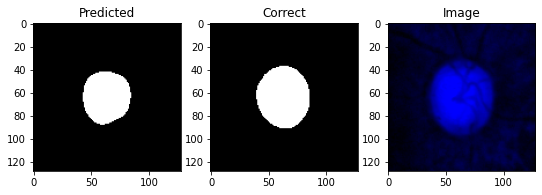

IOU: 0.7792074084281921
Dice: 0.8759039629736766
image #1


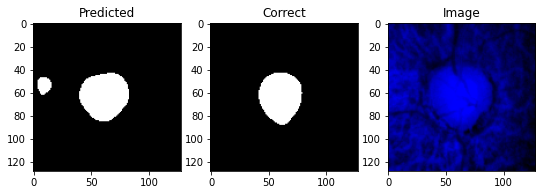

IOU: 0.7786937355995178
Dice: 0.8755793226381462
image #2


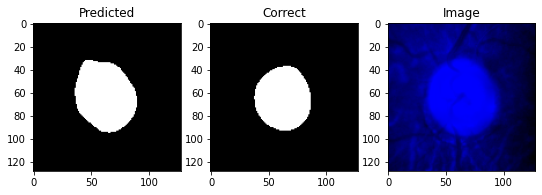

IOU: 0.8299531936645508
Dice: 0.907075873827792
image #3


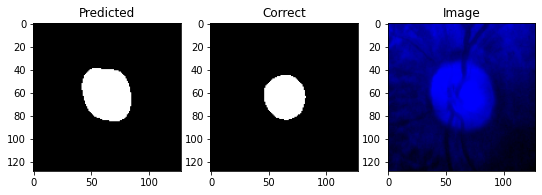

IOU: 0.6770768165588379
Dice: 0.8074487895716946
image #4


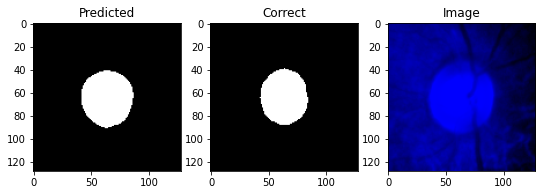

IOU: 0.8708025217056274
Dice: 0.9309400669303316
image #5


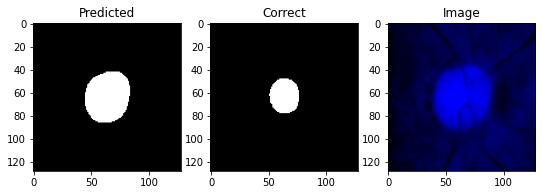

IOU: 0.4469914138317108
Dice: 0.6178217821782178
image #6


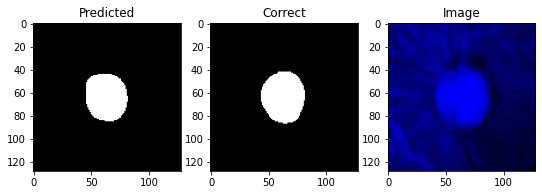

IOU: 0.8895434737205505
Dice: 0.9415432579890881
image #7


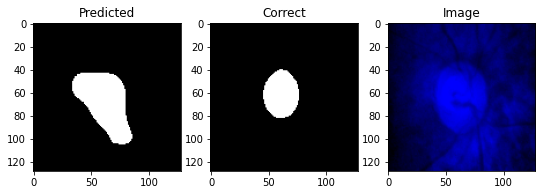

IOU: 0.48846539855003357
Dice: 0.6563342318059299
image #8


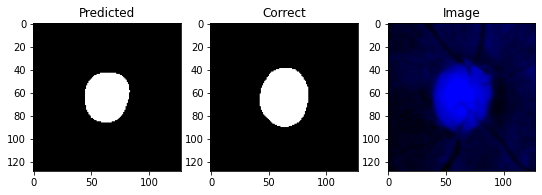

IOU: 0.798235297203064
Dice: 0.8877984952567877
image #9


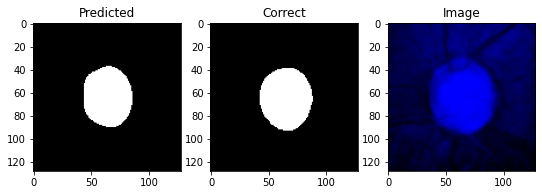

IOU: 0.8800403475761414
Dice: 0.9361930294906167
image #10


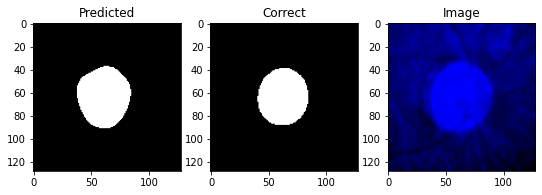

IOU: 0.865878701210022
Dice: 0.928118975488846
image #11


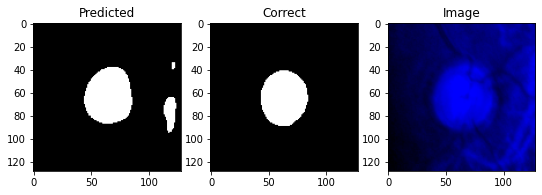

IOU: 0.7475728392601013
Dice: 0.8555555555555555
image #12


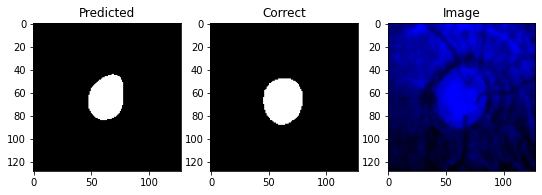

IOU: 0.7768090963363647
Dice: 0.8743866535819431
image #13


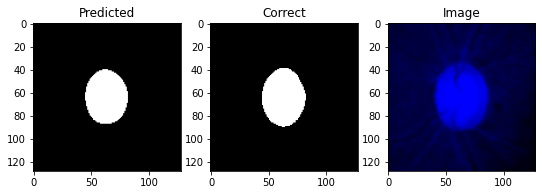

IOU: 0.9284741282463074
Dice: 0.9629106322854115
image #14


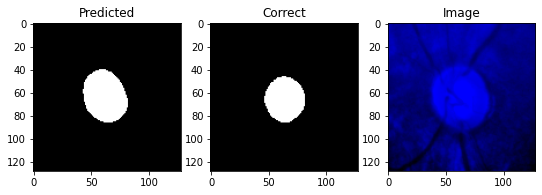

IOU: 0.7699050307273865
Dice: 0.8699958728848535
image #15


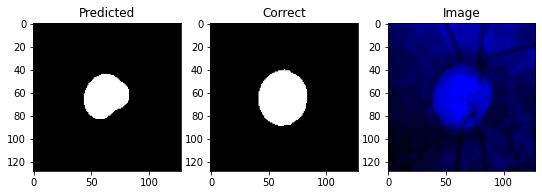

IOU: 0.7063990235328674
Dice: 0.8279411764705882
image #16


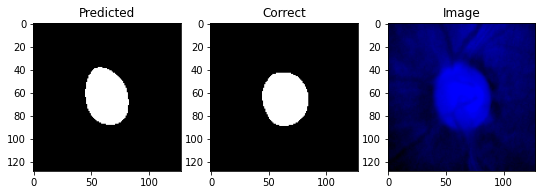

IOU: 0.859226405620575
Dice: 0.9242837653478854
image #17


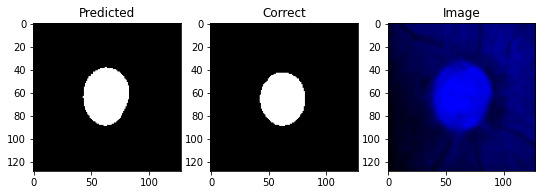

IOU: 0.8650693297386169
Dice: 0.9276538201487492
image #18


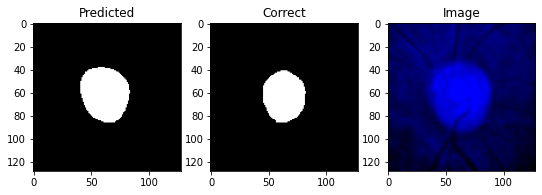

IOU: 0.7968944311141968
Dice: 0.8869685447632216
image #19


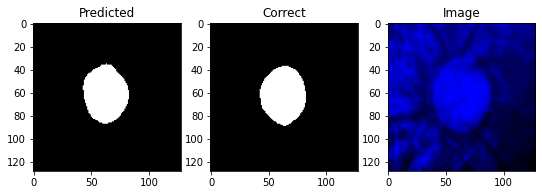

IOU: 0.9015479683876038
Dice: 0.9482253337675024
image #20


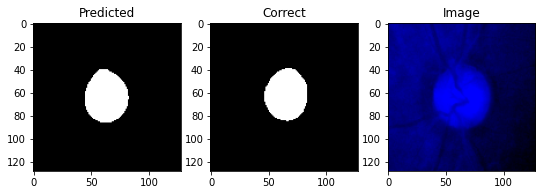

IOU: 0.8036684989929199
Dice: 0.8911487758945386
image #21


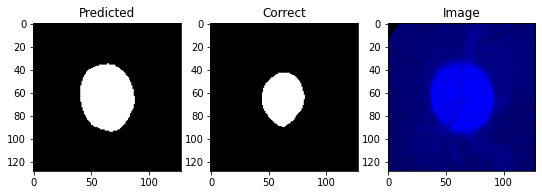

IOU: 0.5989729166030884
Dice: 0.7491970802919709
image #22


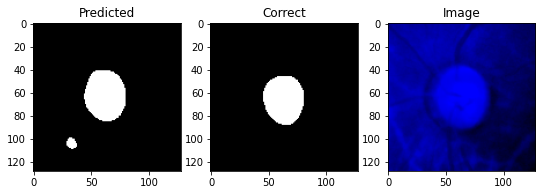

IOU: 0.7610371112823486
Dice: 0.8643056108237167
image #23


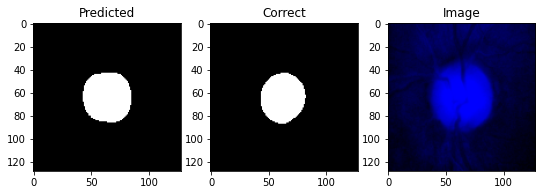

IOU: 0.8498360514640808
Dice: 0.9188231123714995
image #24


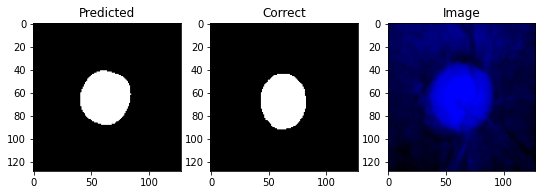

IOU: 0.7991874814033508
Dice: 0.8883870967741936
image #25


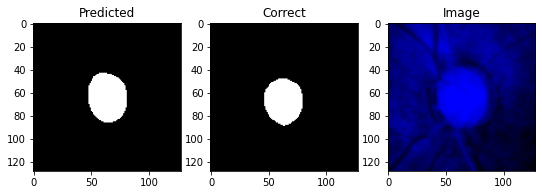

IOU: 0.800650954246521
Dice: 0.8892905558065973
image #26


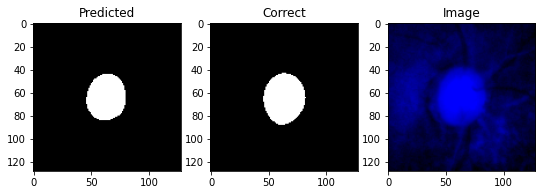

IOU: 0.8745980858802795
Dice: 0.9331046312178388
image #27


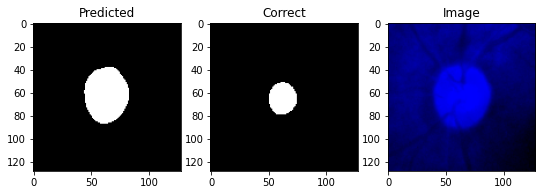

IOU: 0.3630790114402771
Dice: 0.5327336331834083
image #28


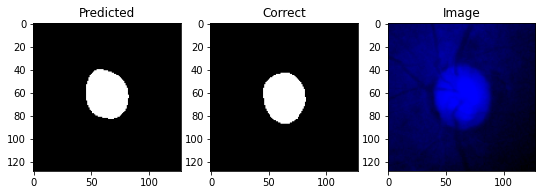

IOU: 0.8551367521286011
Dice: 0.9219123505976096
image #29


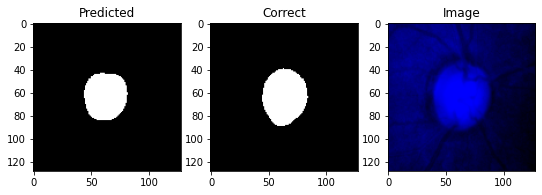

IOU: 0.805940568447113
Dice: 0.8925438596491229
image #30


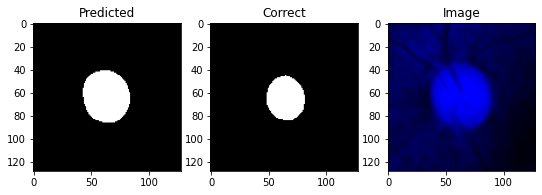

IOU: 0.6782077550888062
Dice: 0.808252427184466
image #31


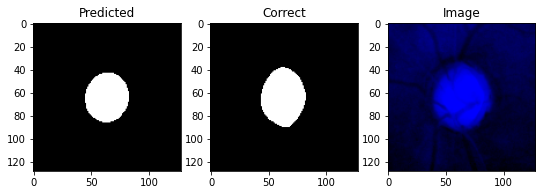

IOU: 0.8436050415039062
Dice: 0.9151689432063264
image #32


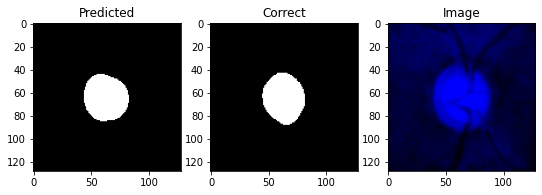

IOU: 0.8706058263778687
Dice: 0.9308276689324271
image #33


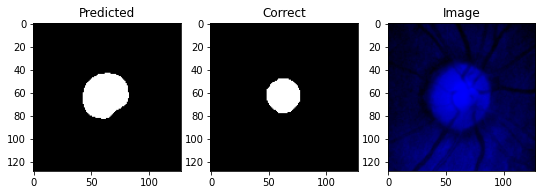

IOU: 0.5648224353790283
Dice: 0.7218997361477573
image #34


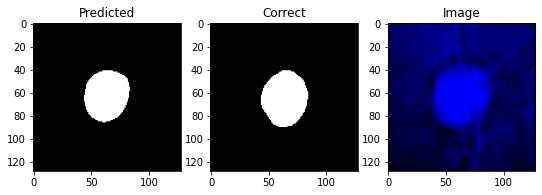

IOU: 0.842775285243988
Dice: 0.9146804835924007
image #35


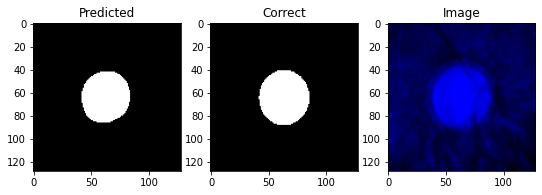

IOU: 0.896237850189209
Dice: 0.94528
image #36


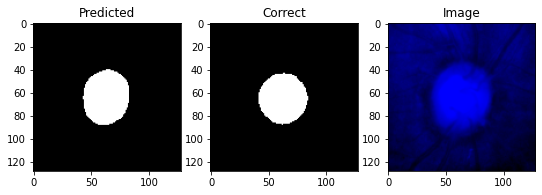

IOU: 0.8857142925262451
Dice: 0.9393939393939394
image #37


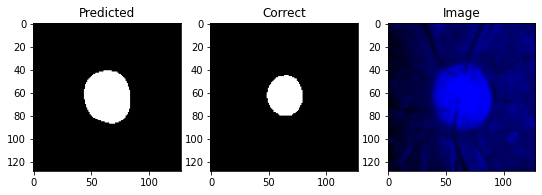

IOU: 0.5764546394348145
Dice: 0.7313304721030043
image #38


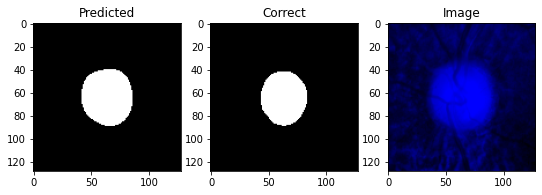

IOU: 0.8373016119003296
Dice: 0.9114470842332614
image #39


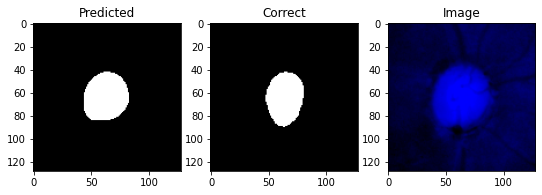

IOU: 0.7729844450950623
Dice: 0.8719585161547666
image #40


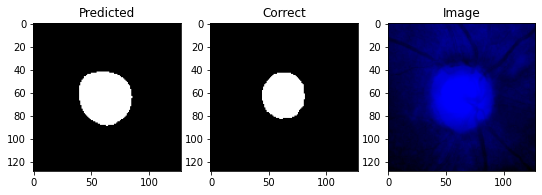

IOU: 0.6904481053352356
Dice: 0.8168817579351239
image #41


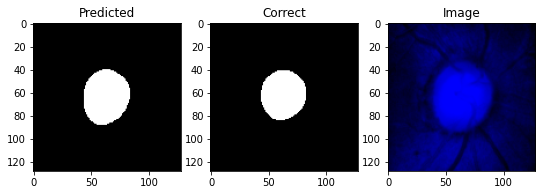

IOU: 0.8800530433654785
Dice: 0.9362002114910116
image #42


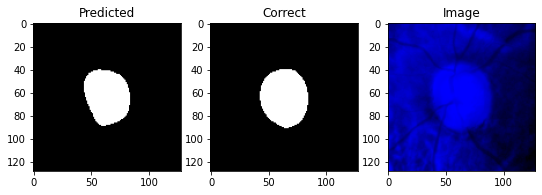

IOU: 0.8593200445175171
Dice: 0.9243379571248423
image #43


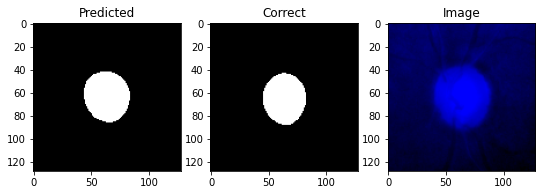

IOU: 0.8658280968666077
Dice: 0.9280898876404494
image #44


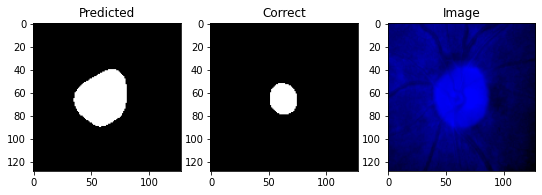

IOU: 0.30598801374435425
Dice: 0.46859238881247134
image #45


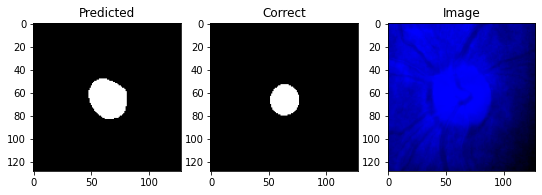

IOU: 0.5909090638160706
Dice: 0.7428571428571429
image #46


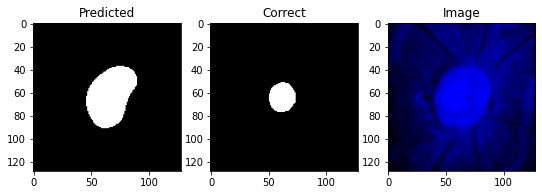

IOU: 0.28338369727134705
Dice: 0.4416195856873823
image #47


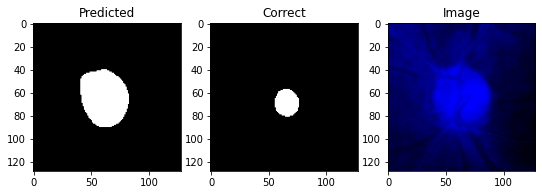

IOU: 0.2410443276166916
Dice: 0.388454011741683
image #48


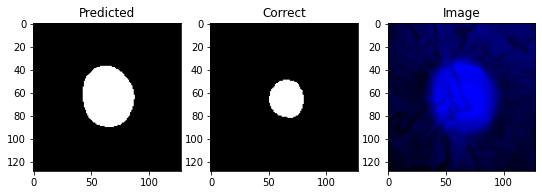

IOU: 0.4139957129955292
Dice: 0.5855685681904043
image #49


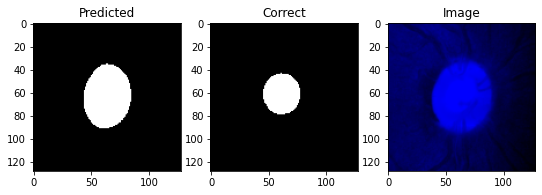

IOU: 0.503923773765564
Dice: 0.670145359672009
image #50


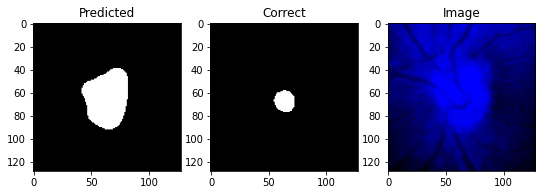

IOU: 0.16761904954910278
Dice: 0.28711256117455136


In [9]:
pred_iou, pred_dice, pred_cup = predict(value_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.72039443
0.8196906775067205


### Training and Test disc

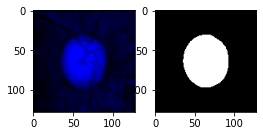

In [11]:
X_test, Z_test = next(data_generator(value_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size) 

history_disc = train(value_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_value', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 60s 504ms/step - loss: 0.9951 - mean_IOU_gpu: 0.1453 - dice_metric: 0.2531 - val_loss: 0.9992 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 47s 476ms/step - loss: 1.0239 - mean_IOU_gpu: 0.0563 - dice_metric: 0.1047 - val_loss: 0.9828 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 47s 479ms/step - loss: 0.9987 - mean_IOU_gpu: 0.0059 - dice_metric: 0.0116 - val_loss: 0.9637 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 47s 473ms/step - loss: 0.9650 - mean_IOU_gpu: 0.0041 - dice_metric: 0.0081 - val_loss: 0.9374 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 47s 475ms/step - loss: 0.9592 - mean_IOU_gpu: 0.0219 - dice_metric: 0.0424 - val_loss: 0.8999 - val_mean_IOU_gpu: 0

99/99 [==============================] - 47s 477ms/step - loss: 0.0735 - mean_IOU_gpu: 0.8489 - dice_metric: 0.9146 - val_loss: 1.1331 - val_mean_IOU_gpu: 0.1359 - val_dice_metric: 0.2291
Epoch 42/500
99/99 [==============================] - 48s 483ms/step - loss: 0.0836 - mean_IOU_gpu: 0.8409 - dice_metric: 0.9082 - val_loss: 0.7024 - val_mean_IOU_gpu: 0.2871 - val_dice_metric: 0.4374
Epoch 43/500
99/99 [==============================] - 47s 475ms/step - loss: 0.0760 - mean_IOU_gpu: 0.8444 - dice_metric: 0.9113 - val_loss: 1.6078 - val_mean_IOU_gpu: 0.0154 - val_dice_metric: 0.0287
Epoch 44/500
99/99 [==============================] - 47s 474ms/step - loss: 0.0817 - mean_IOU_gpu: 0.8334 - dice_metric: 0.9048 - val_loss: 0.6260 - val_mean_IOU_gpu: 0.3250 - val_dice_metric: 0.4820
Epoch 45/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1087 - mean_IOU_gpu: 0.8040 - dice_metric: 0.8821 - val_loss: 0.5084 - val_mean_IOU_gpu: 0.4010 - val_dice_metric: 0.5665
Epoch 46

Epoch 82/500
99/99 [==============================] - 48s 485ms/step - loss: 0.0631 - mean_IOU_gpu: 0.8633 - dice_metric: 0.9245 - val_loss: 0.8823 - val_mean_IOU_gpu: 0.2089 - val_dice_metric: 0.3352
Epoch 83/500
99/99 [==============================] - 47s 477ms/step - loss: 0.0601 - mean_IOU_gpu: 0.8654 - dice_metric: 0.9267 - val_loss: 0.7169 - val_mean_IOU_gpu: 0.2767 - val_dice_metric: 0.4232
Epoch 84/500
99/99 [==============================] - 49s 493ms/step - loss: 0.0567 - mean_IOU_gpu: 0.8733 - dice_metric: 0.9309 - val_loss: 0.4649 - val_mean_IOU_gpu: 0.4189 - val_dice_metric: 0.5801
Epoch 85/500
99/99 [==============================] - 49s 495ms/step - loss: 0.0537 - mean_IOU_gpu: 0.8776 - dice_metric: 0.9337 - val_loss: 0.5025 - val_mean_IOU_gpu: 0.3946 - val_dice_metric: 0.5558
Epoch 86/500
99/99 [==============================] - 47s 478ms/step - loss: 0.0490 - mean_IOU_gpu: 0.8869 - dice_metric: 0.9390 - val_loss: 0.5475 - val_mean_IOU_gpu: 0.3657 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 47s 478ms/step - loss: 0.0413 - mean_IOU_gpu: 0.9025 - dice_metric: 0.9481 - val_loss: 0.3119 - val_mean_IOU_gpu: 0.5452 - val_dice_metric: 0.6958
Epoch 124/500
99/99 [==============================] - 48s 489ms/step - loss: 0.0487 - mean_IOU_gpu: 0.8875 - dice_metric: 0.9395 - val_loss: 0.3672 - val_mean_IOU_gpu: 0.4945 - val_dice_metric: 0.6513
Epoch 125/500
99/99 [==============================] - 48s 487ms/step - loss: 0.0440 - mean_IOU_gpu: 0.8961 - dice_metric: 0.9446 - val_loss: 0.3878 - val_mean_IOU_gpu: 0.4790 - val_dice_metric: 0.6367
Epoch 126/500
99/99 [==============================] - 50s 500ms/step - loss: 0.0460 - mean_IOU_gpu: 0.8935 - dice_metric: 0.9430 - val_loss: 0.2992 - val_mean_IOU_gpu: 0.5576 - val_dice_metric: 0.7073
Epoch 127/500
99/99 [==============================] - 50s 506ms/step - loss: 0.0462 - mean_IOU_gpu: 0.8917 - dice_metric: 0.9420 - val_loss: 0.3657 - val_mean_IOU_gpu: 0.4967 - val_dice_metri

99/99 [==============================] - 34s 346ms/step - loss: 0.0408 - mean_IOU_gpu: 0.9022 - dice_metric: 0.9481 - val_loss: 0.2061 - val_mean_IOU_gpu: 0.6581 - val_dice_metric: 0.7879
Epoch 164/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0471 - mean_IOU_gpu: 0.8890 - dice_metric: 0.9405 - val_loss: 0.2201 - val_mean_IOU_gpu: 0.6424 - val_dice_metric: 0.7761
Epoch 165/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0380 - mean_IOU_gpu: 0.9087 - dice_metric: 0.9517 - val_loss: 0.3064 - val_mean_IOU_gpu: 0.5530 - val_dice_metric: 0.7043
Epoch 166/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0433 - mean_IOU_gpu: 0.8980 - dice_metric: 0.9455 - val_loss: 0.2640 - val_mean_IOU_gpu: 0.5949 - val_dice_metric: 0.7386
Epoch 167/500
99/99 [==============================] - 34s 343ms/step - loss: 0.0461 - mean_IOU_gpu: 0.8927 - dice_metric: 0.9424 - val_loss: 0.2960 - val_mean_IOU_gpu: 0.5626 - val_dice_metric: 0.7119
Epoc

Epoch 204/500
99/99 [==============================] - 33s 328ms/step - loss: 0.0390 - mean_IOU_gpu: 0.9059 - dice_metric: 0.9502 - val_loss: 0.2435 - val_mean_IOU_gpu: 0.6208 - val_dice_metric: 0.7589
Epoch 205/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0412 - mean_IOU_gpu: 0.9025 - dice_metric: 0.9481 - val_loss: 0.1783 - val_mean_IOU_gpu: 0.6937 - val_dice_metric: 0.8134
Epoch 206/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0424 - mean_IOU_gpu: 0.9000 - dice_metric: 0.9466 - val_loss: 0.1677 - val_mean_IOU_gpu: 0.7075 - val_dice_metric: 0.8232
Epoch 207/500
99/99 [==============================] - 33s 332ms/step - loss: 0.0378 - mean_IOU_gpu: 0.9095 - dice_metric: 0.9520 - val_loss: 0.1998 - val_mean_IOU_gpu: 0.6695 - val_dice_metric: 0.7957
Epoch 208/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0397 - mean_IOU_gpu: 0.9054 - dice_metric: 0.9498 - val_loss: 0.2048 - val_mean_IOU_gpu: 0.6629 - val_dice_metri

99/99 [==============================] - 33s 334ms/step - loss: 0.0430 - mean_IOU_gpu: 0.8999 - dice_metric: 0.9464 - val_loss: 0.1898 - val_mean_IOU_gpu: 0.6814 - val_dice_metric: 0.8046
Epoch 245/500
99/99 [==============================] - 33s 338ms/step - loss: 0.0364 - mean_IOU_gpu: 0.9111 - dice_metric: 0.9531 - val_loss: 0.1770 - val_mean_IOU_gpu: 0.6968 - val_dice_metric: 0.8158
Epoch 246/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0391 - mean_IOU_gpu: 0.9067 - dice_metric: 0.9504 - val_loss: 0.1657 - val_mean_IOU_gpu: 0.7107 - val_dice_metric: 0.8255
Epoch 247/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0413 - mean_IOU_gpu: 0.9008 - dice_metric: 0.9473 - val_loss: 0.2000 - val_mean_IOU_gpu: 0.6699 - val_dice_metric: 0.7961
Epoch 248/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0435 - mean_IOU_gpu: 0.8976 - dice_metric: 0.9450 - val_loss: 0.1733 - val_mean_IOU_gpu: 0.7010 - val_dice_metric: 0.8184
Epoc

Epoch 285/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0402 - mean_IOU_gpu: 0.9043 - dice_metric: 0.9491 - val_loss: 0.1453 - val_mean_IOU_gpu: 0.7383 - val_dice_metric: 0.8443
Epoch 286/500
99/99 [==============================] - 33s 332ms/step - loss: 0.0363 - mean_IOU_gpu: 0.9114 - dice_metric: 0.9533 - val_loss: 0.1724 - val_mean_IOU_gpu: 0.7057 - val_dice_metric: 0.8213
Epoch 287/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0422 - mean_IOU_gpu: 0.9004 - dice_metric: 0.9469 - val_loss: 0.1549 - val_mean_IOU_gpu: 0.7260 - val_dice_metric: 0.8356
Epoch 288/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0405 - mean_IOU_gpu: 0.9034 - dice_metric: 0.9486 - val_loss: 0.1676 - val_mean_IOU_gpu: 0.7108 - val_dice_metric: 0.8249
Epoch 289/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0413 - mean_IOU_gpu: 0.9015 - dice_metric: 0.9475 - val_loss: 0.1548 - val_mean_IOU_gpu: 0.7264 - val_dice_metri

99/99 [==============================] - 37s 377ms/step - loss: 0.0369 - mean_IOU_gpu: 0.9110 - dice_metric: 0.9528 - val_loss: 0.1278 - val_mean_IOU_gpu: 0.7598 - val_dice_metric: 0.8596
Epoch 326/500
99/99 [==============================] - 37s 371ms/step - loss: 0.0374 - mean_IOU_gpu: 0.9095 - dice_metric: 0.9522 - val_loss: 0.1594 - val_mean_IOU_gpu: 0.7179 - val_dice_metric: 0.8308
Epoch 327/500
99/99 [==============================] - 37s 371ms/step - loss: 0.0374 - mean_IOU_gpu: 0.9098 - dice_metric: 0.9523 - val_loss: 0.1306 - val_mean_IOU_gpu: 0.7556 - val_dice_metric: 0.8569
Epoch 328/500
99/99 [==============================] - 57s 576ms/step - loss: 0.0367 - mean_IOU_gpu: 0.9103 - dice_metric: 0.9526 - val_loss: 0.1229 - val_mean_IOU_gpu: 0.7667 - val_dice_metric: 0.8643
Epoch 329/500
99/99 [==============================] - 68s 685ms/step - loss: 0.0398 - mean_IOU_gpu: 0.9051 - dice_metric: 0.9494 - val_loss: 0.1700 - val_mean_IOU_gpu: 0.7048 - val_dice_metric: 0.8214
Epoc

Epoch 366/500
99/99 [==============================] - 62s 624ms/step - loss: 0.0405 - mean_IOU_gpu: 0.9032 - dice_metric: 0.9485 - val_loss: 0.1358 - val_mean_IOU_gpu: 0.7513 - val_dice_metric: 0.8530
Epoch 367/500
99/99 [==============================] - 62s 629ms/step - loss: 0.0363 - mean_IOU_gpu: 0.9128 - dice_metric: 0.9538 - val_loss: 0.1049 - val_mean_IOU_gpu: 0.7956 - val_dice_metric: 0.8827
Epoch 368/500
99/99 [==============================] - 63s 633ms/step - loss: 0.0359 - mean_IOU_gpu: 0.9126 - dice_metric: 0.9539 - val_loss: 0.1115 - val_mean_IOU_gpu: 0.7858 - val_dice_metric: 0.8762
Epoch 369/500
99/99 [==============================] - 63s 634ms/step - loss: 0.0352 - mean_IOU_gpu: 0.9134 - dice_metric: 0.9545 - val_loss: 0.1230 - val_mean_IOU_gpu: 0.7693 - val_dice_metric: 0.8652
Epoch 370/500
99/99 [==============================] - 60s 609ms/step - loss: 0.0345 - mean_IOU_gpu: 0.9154 - dice_metric: 0.9556 - val_loss: 0.1154 - val_mean_IOU_gpu: 0.7798 - val_dice_metri

99/99 [==============================] - 61s 614ms/step - loss: 0.0359 - mean_IOU_gpu: 0.9121 - dice_metric: 0.9537 - val_loss: 0.1000 - val_mean_IOU_gpu: 0.8006 - val_dice_metric: 0.8866
Epoch 407/500
99/99 [==============================] - 61s 619ms/step - loss: 0.0353 - mean_IOU_gpu: 0.9131 - dice_metric: 0.9543 - val_loss: 0.0938 - val_mean_IOU_gpu: 0.8103 - val_dice_metric: 0.8928
Epoch 408/500
99/99 [==============================] - 62s 627ms/step - loss: 0.0366 - mean_IOU_gpu: 0.9114 - dice_metric: 0.9532 - val_loss: 0.1009 - val_mean_IOU_gpu: 0.7989 - val_dice_metric: 0.8855
Epoch 409/500
99/99 [==============================] - 60s 611ms/step - loss: 0.0361 - mean_IOU_gpu: 0.9129 - dice_metric: 0.9540 - val_loss: 0.1219 - val_mean_IOU_gpu: 0.7686 - val_dice_metric: 0.8657
Epoch 410/500
99/99 [==============================] - 61s 617ms/step - loss: 0.0369 - mean_IOU_gpu: 0.9115 - dice_metric: 0.9531 - val_loss: 0.0989 - val_mean_IOU_gpu: 0.8025 - val_dice_metric: 0.8878
Epoc

Epoch 447/500
99/99 [==============================] - 62s 628ms/step - loss: 0.0372 - mean_IOU_gpu: 0.9104 - dice_metric: 0.9525 - val_loss: 0.0969 - val_mean_IOU_gpu: 0.8054 - val_dice_metric: 0.8896
Epoch 448/500
99/99 [==============================] - 62s 623ms/step - loss: 0.0360 - mean_IOU_gpu: 0.9117 - dice_metric: 0.9535 - val_loss: 0.0939 - val_mean_IOU_gpu: 0.8103 - val_dice_metric: 0.8928
Epoch 449/500
99/99 [==============================] - 62s 623ms/step - loss: 0.0362 - mean_IOU_gpu: 0.9119 - dice_metric: 0.9535 - val_loss: 0.0996 - val_mean_IOU_gpu: 0.8012 - val_dice_metric: 0.8869
Epoch 450/500
99/99 [==============================] - 64s 643ms/step - loss: 0.0344 - mean_IOU_gpu: 0.9155 - dice_metric: 0.9556 - val_loss: 0.1018 - val_mean_IOU_gpu: 0.7981 - val_dice_metric: 0.8849
Epoch 451/500
99/99 [==============================] - 63s 643ms/step - loss: 0.0371 - mean_IOU_gpu: 0.9108 - dice_metric: 0.9527 - val_loss: 0.0850 - val_mean_IOU_gpu: 0.8244 - val_dice_metri

99/99 [==============================] - 63s 636ms/step - loss: 0.0347 - mean_IOU_gpu: 0.9154 - dice_metric: 0.9554 - val_loss: 0.0914 - val_mean_IOU_gpu: 0.8154 - val_dice_metric: 0.8957
Epoch 488/500
99/99 [==============================] - 62s 630ms/step - loss: 0.0365 - mean_IOU_gpu: 0.9121 - dice_metric: 0.9534 - val_loss: 0.1049 - val_mean_IOU_gpu: 0.7939 - val_dice_metric: 0.8819
Epoch 489/500
99/99 [==============================] - 62s 631ms/step - loss: 0.0392 - mean_IOU_gpu: 0.9061 - dice_metric: 0.9501 - val_loss: 0.1028 - val_mean_IOU_gpu: 0.7973 - val_dice_metric: 0.8841
Epoch 490/500
99/99 [==============================] - 62s 623ms/step - loss: 0.0369 - mean_IOU_gpu: 0.9109 - dice_metric: 0.9528 - val_loss: 0.1026 - val_mean_IOU_gpu: 0.7980 - val_dice_metric: 0.8845
Epoch 491/500
99/99 [==============================] - 63s 635ms/step - loss: 0.0341 - mean_IOU_gpu: 0.9159 - dice_metric: 0.9558 - val_loss: 0.0885 - val_mean_IOU_gpu: 0.8206 - val_dice_metric: 0.8989
Epoc

image #0


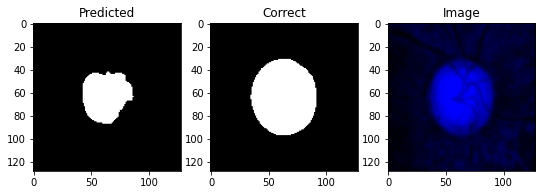

IOU: 0.5003373622894287
Dice: 0.6669664942657971
image #1


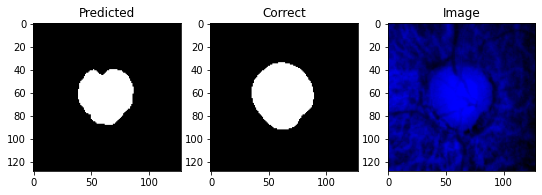

IOU: 0.7634640336036682
Dice: 0.8658685560713413
image #2


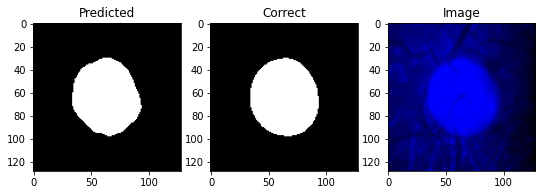

IOU: 0.9257518649101257
Dice: 0.961444607125427
image #3


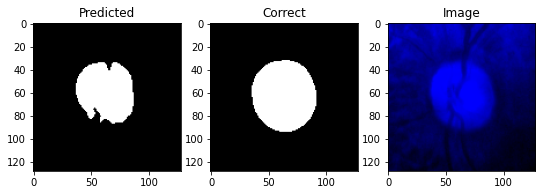

IOU: 0.7530909180641174
Dice: 0.859157851068243
image #4


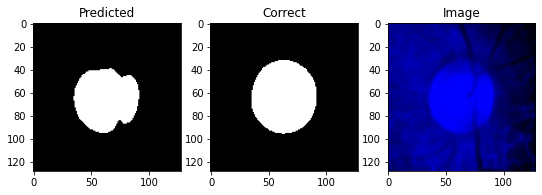

IOU: 0.8459649085998535
Dice: 0.9165557878730279
image #5


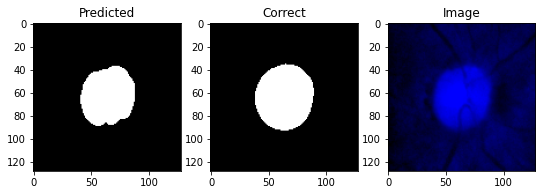

IOU: 0.8421512842178345
Dice: 0.9143128412057916
image #6


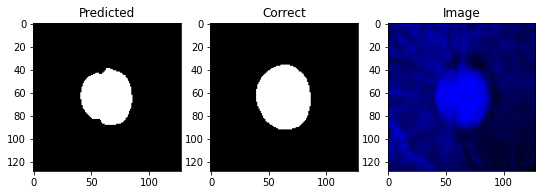

IOU: 0.8054623603820801
Dice: 0.8922505307855626
image #7


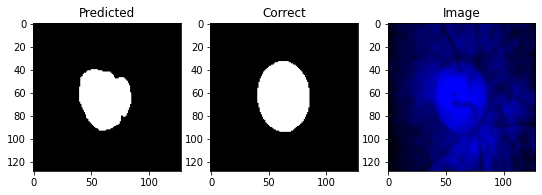

IOU: 0.8025248050689697
Dice: 0.8904452226113057
image #8


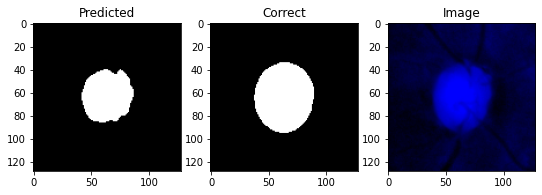

IOU: 0.6571892499923706
Dice: 0.7931372549019607
image #9


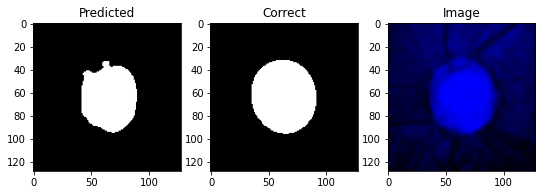

IOU: 0.8030887842178345
Dice: 0.8907922912205567
image #10


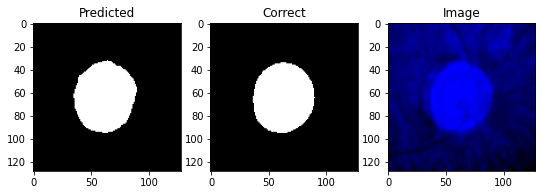

IOU: 0.9302939176559448
Dice: 0.963888346671872
image #11


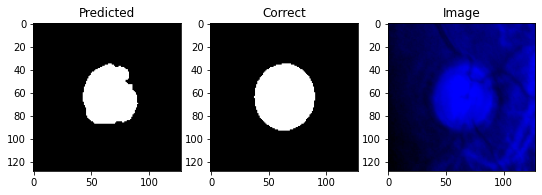

IOU: 0.7966457009315491
Dice: 0.8868144690781797
image #12


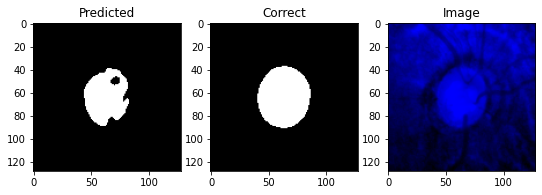

IOU: 0.7105674147605896
Dice: 0.8307973219720024
image #13


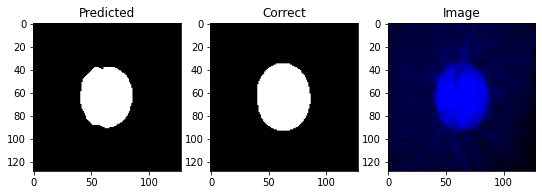

IOU: 0.8861111402511597
Dice: 0.9396170839469808
image #14


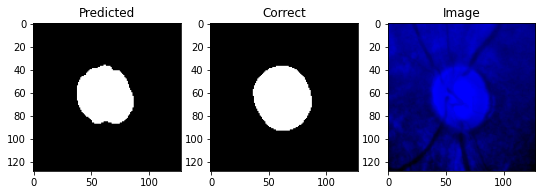

IOU: 0.8720614910125732
Dice: 0.9316590195604927
image #15


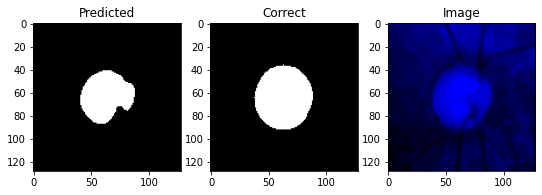

IOU: 0.6969835758209229
Dice: 0.8214381901427417
image #16


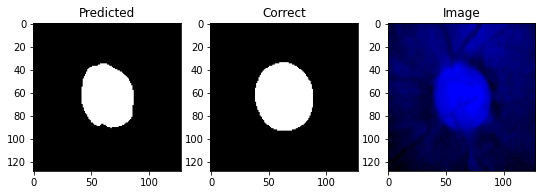

IOU: 0.848267138004303
Dice: 0.9179053281500115
image #17


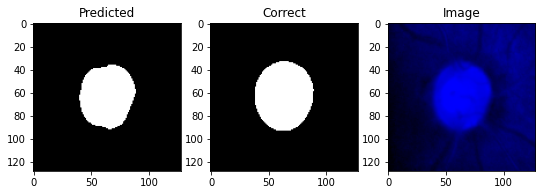

IOU: 0.8651685118675232
Dice: 0.927710843373494
image #18


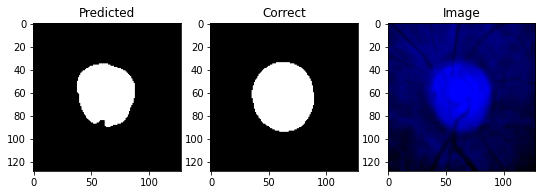

IOU: 0.8222914934158325
Dice: 0.9024807527801539
image #19


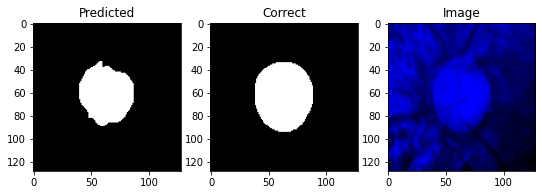

IOU: 0.7767308354377747
Dice: 0.8743370993774499
image #20


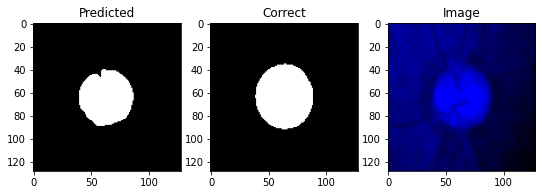

IOU: 0.7972789406776428
Dice: 0.8872066616199848
image #21


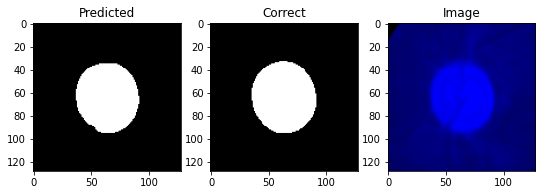

IOU: 0.9531992673873901
Dice: 0.9760389367278173
image #22


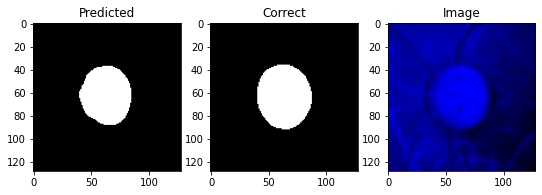

IOU: 0.8522944450378418
Dice: 0.920258064516129
image #23


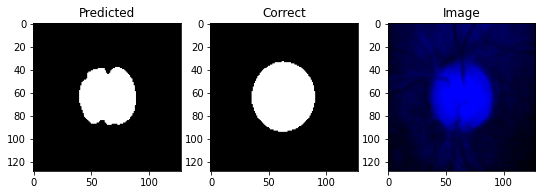

IOU: 0.7692901492118835
Dice: 0.8696031399912778
image #24


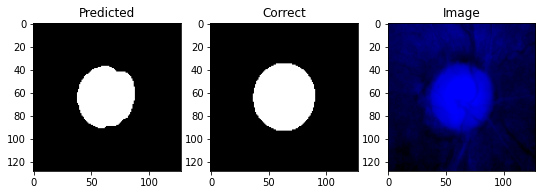

IOU: 0.8440145254135132
Dice: 0.9154098360655738
image #25


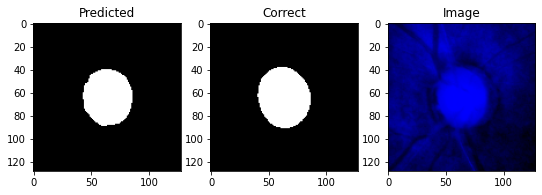

IOU: 0.8815719485282898
Dice: 0.9370589895568727
image #26


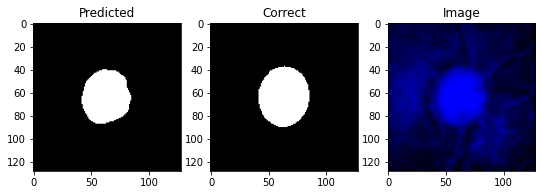

IOU: 0.8610957264900208
Dice: 0.9253642581028844
image #27


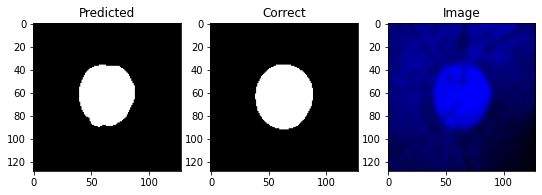

IOU: 0.9117116928100586
Dice: 0.9538171536286523
image #28


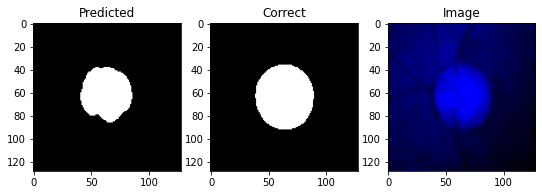

IOU: 0.7215808033943176
Dice: 0.8382770183131287
image #29


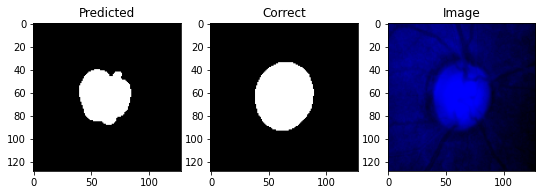

IOU: 0.6929898858070374
Dice: 0.8186580194562235
image #30


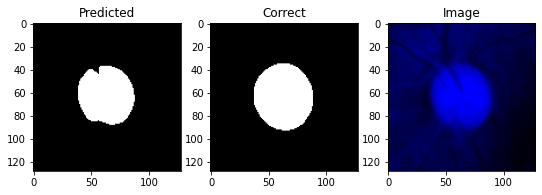

IOU: 0.8415417671203613
Dice: 0.913953488372093
image #31


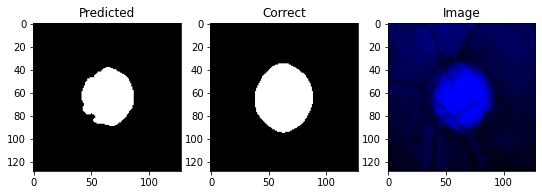

IOU: 0.7503296732902527
Dice: 0.8573581115017579
image #32


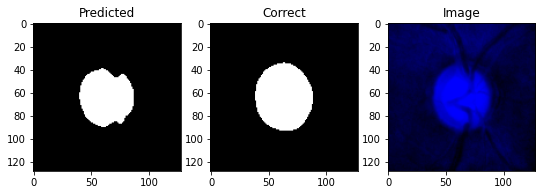

IOU: 0.7873913049697876
Dice: 0.8810508392118706
image #33


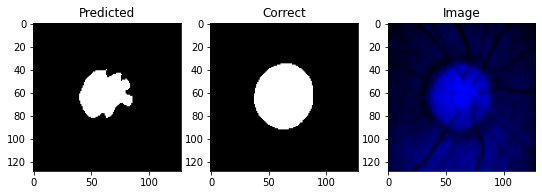

IOU: 0.5800524950027466
Dice: 0.7342192691029901
image #34


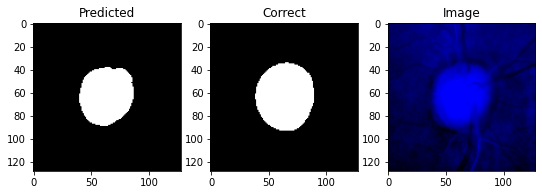

IOU: 0.8089982867240906
Dice: 0.8944157672454247
image #35


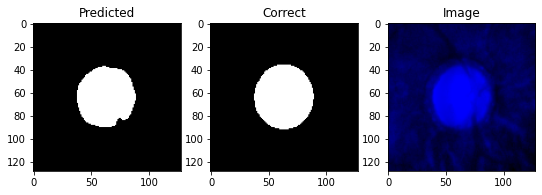

IOU: 0.9104477763175964
Dice: 0.953125
image #36


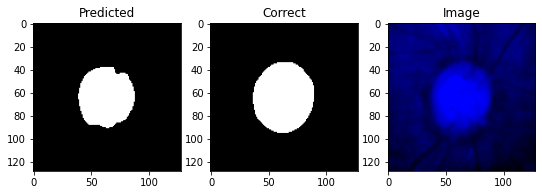

IOU: 0.7905060648918152
Dice: 0.8829973707274321
image #37


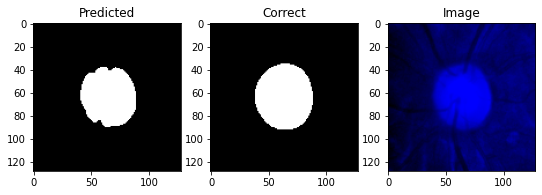

IOU: 0.8614035248756409
Dice: 0.9255419415645617
image #38


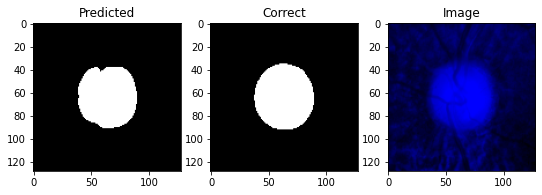

IOU: 0.9311946034431458
Dice: 0.9643715846994535
image #39


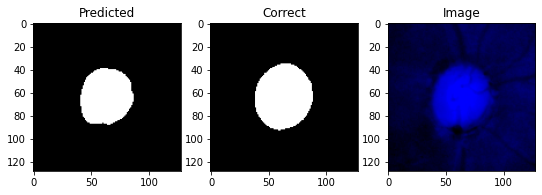

IOU: 0.803491473197937
Dice: 0.8910399602879127
image #40


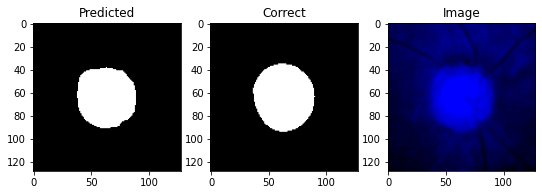

IOU: 0.8857026100158691
Dice: 0.9393873560721269
image #41


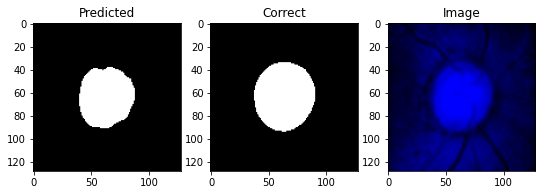

IOU: 0.8132311701774597
Dice: 0.8969966629588432
image #42


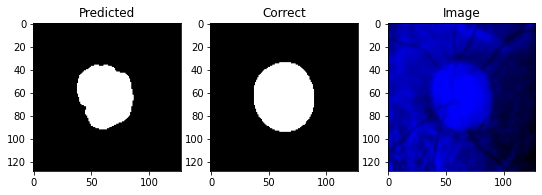

IOU: 0.8113430738449097
Dice: 0.8958469232441835
image #43


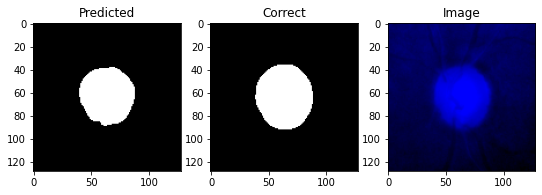

IOU: 0.8507259488105774
Dice: 0.9193429762196617
image #44


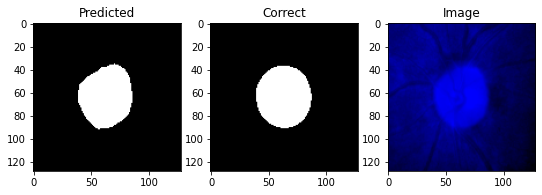

IOU: 0.9028760194778442
Dice: 0.9489593657086224
image #45


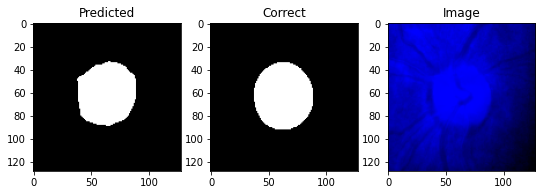

IOU: 0.8831908702850342
Dice: 0.9379727685325264
image #46


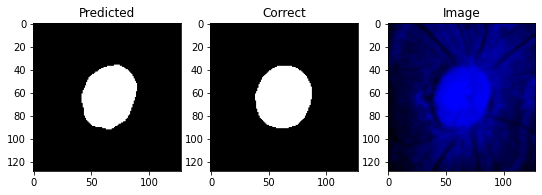

IOU: 0.8855835199356079
Dice: 0.9393203883495146
image #47


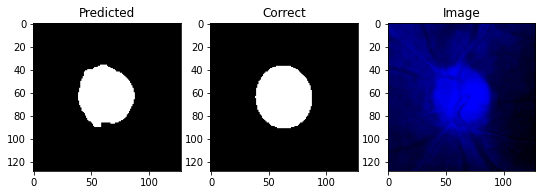

IOU: 0.8893557190895081
Dice: 0.9414381022979985
image #48


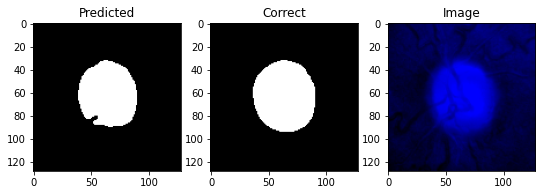

IOU: 0.8660915493965149
Dice: 0.9282412060301507
image #49


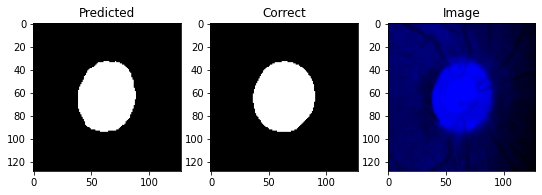

IOU: 0.9287649989128113
Dice: 0.9630670413488559
image #50


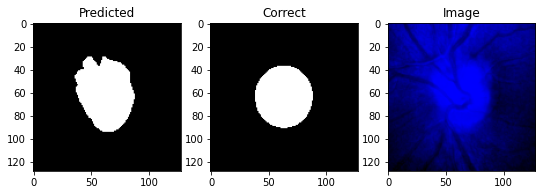

IOU: 0.7835091948509216
Dice: 0.878615249780894


In [13]:
pred_iou, pred_dice, pred_disc = predict(value_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.8187236
0.8975790851650551


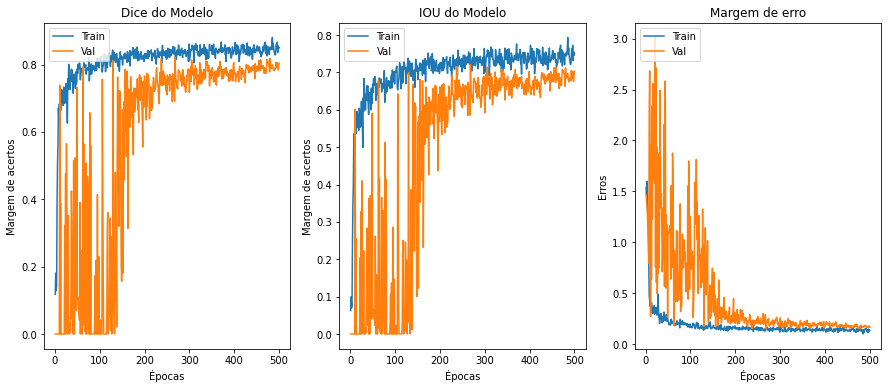

In [15]:
plot_results(history_cup, epochs)

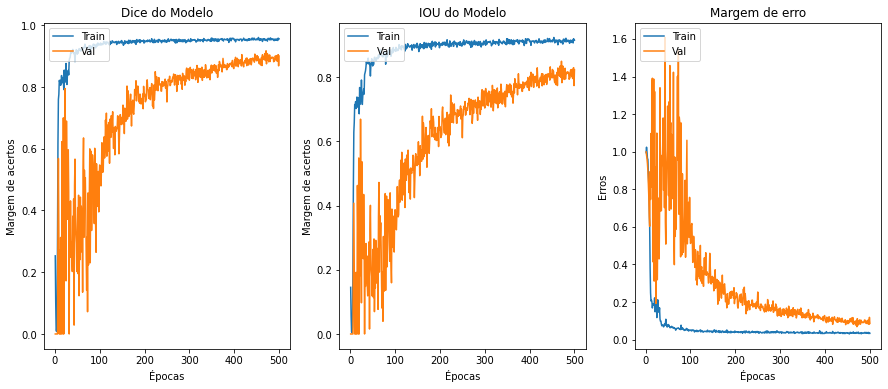

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 1.001400528860984
image #1 - cdr = 0.903749089962385
image #2 - cdr = 0.9666462531929534
image #3 - cdr = 1.0691798445154688
image #4 - cdr = 0.8518205289668795
image #5 - cdr = 0.8691270028696766
image #6 - cdr = 0.8942533584176346
image #7 - cdr = 1.3848961927515484
image #8 - cdr = 0.9440889214476108
image #9 - cdr = 0.8921081287564451
image #10 - cdr = 0.8598995868649503
image #11 - cdr = 0.947096365895331
image #12 - cdr = 0.8411776974196494
image #13 - cdr = 0.8815230187730746
image #14 - cdr = 0.9010483153315773
image #15 - cdr = 0.8509172146756857
image #16 - cdr = 0.9015411764555531
image #17 - cdr = 0.8967515218176564
image #18 - cdr = 0.899458539218132
image #19 - cdr = 0.9587297494966618
image #20 - cdr = 0.9522848730018943
image #21 - cdr = 0.9589991068936924
image #22 - cdr = 0.8772833239590786
image #23 - cdr = 0.8818064179960065
image #24 - cdr = 0.8767284992404345
image #25 - cdr = 0.8879307851707784
image #26 - cdr = 0.8631470351669425
image #27 - cdr

In [18]:
pd.DataFrame(data= result)

cdr      area
0   1.001401  1.020904
1   0.903749  0.858916
2   0.966646  0.851333
3   1.069180  0.771938
4   0.851821  0.715585
5   0.869127  0.724818
6   0.894253  0.729328
7   1.384896  1.083150
8   0.944089  0.838690
9   0.892108  0.783217
10  0.859900  0.745815
11  0.947096  0.983787
12  0.841178  0.696703
13  0.881523  0.712121
14  0.901048  0.699897
15  0.850917  0.738361
16  0.901541  0.728088
17  0.896752  0.744108
18  0.899459  0.752820
19  0.958730  0.800526
20  0.952285  0.762230
21  0.958999  0.821634
22  0.877283  0.743991
23  0.881806  0.753761
24  0.876728  0.765998
25  0.887931  0.696332
26  0.863147  0.701157
27  0.900237  0.717147
28  0.929662  0.769231
29  0.895573  0.764778
30  0.892733  0.749618
31  0.887506  0.748682
32  0.844979  0.692435
33  0.933004  0.913273
34  0.868946  0.725603
35  0.854674  0.713604
36  0.918704  0.753846
37  0.892842  0.749873
38  0.915825  0.787120
39  0.868048  0.737047
40  0.895569  0.779412
41  0.903218  0.748512
42  0.882316  0.722302
43  0.884261  0.734400
44  0.918376  0.837513
45  0.655553  0.400177
46  1.021948  0.815673
47  0.989095  0.844182
48  0.930108  0.810741
49  0.894071  0.737495
50  0.819805  0.642857

In [19]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   42.050327  46.229576  42.411598  46.164921
1   41.033653  43.580082  47.998989  48.221439
2   50.958961  64.704773  57.802990  66.937386
3   41.127945  49.903915  34.446278  46.674950
4   45.198925  49.130516  54.364063  57.677074
5   38.577526  46.329193  46.445641  53.305435
6   36.547134  43.039272  44.923790  48.128723
7   38.552517  73.294167  44.834385  52.923943
8   38.780594  44.913738  43.670227  47.573631
9   43.261906  53.025368  50.033604  59.438274
10  46.311455  53.255383  53.155087  61.932095
11  41.721333  50.100456  46.909042  52.899006
12  30.165047  40.648716  37.761597  48.323578
13  36.867126  47.253227  45.781071  53.604076
14  36.798759  47.292896  47.424603  52.486526
15  35.552559  41.399532  41.658333  48.652832
16  36.646088  51.129711  45.405701  56.713673
17  39.328926  50.296467  47.685894  56.087406
18  41.706242  49.390133  49.891544  54.910961
19  38.921642  50.415257  46.876575  52.585472
20  37.699928  45.869686  46.930893  48.168030
21  46.783535  58.624001  54.569645  61.130402
22  35.824829  45.237328  44.428394  51.565243
23  42.931519  44.802628  50.717510  50.807781
24  43.503311  47.221203  49.811344  53.860691
25  33.832233  43.803585  43.162487  49.332207
26  34.066097  40.916328  42.132046  47.403660
27  38.399029  49.070042  48.237839  54.507927
28  36.556297  43.856297  44.541786  47.174469
29  37.919598  42.406456  44.907299  47.351189
30  40.698910  46.269302  48.656075  51.828827
31  37.786190  43.367138  44.890678  48.864071
32  38.544838  41.766014  47.444878  49.428482
33  36.862164  42.401821  39.086166  45.446556
34  38.615181  45.946117  46.296677  52.875679
35  42.044910  45.489357  50.385815  53.224205
36  40.121162  48.357090  49.114773  52.636227
37  40.368160  46.864243  48.111408  52.488857
38  45.032402  50.085423  52.263889  54.688869
39  38.526917  44.077564  45.431057  50.777802
40  44.942635  48.494553  51.591866  54.149422
41  40.046654  48.401070  48.308804  53.587357
42  38.884571  50.093319  47.513988  56.774811
43  39.593384  44.625401  47.639114  50.466347
44  42.845108  50.903484  46.551449  55.427692
45  31.246443  36.962448  51.356106  56.383621
46  37.339287  58.462292  45.396076  57.206692
47  41.056641  51.715553  48.345051  52.285709
48  44.666492  53.724380  51.107845  57.761429
49  40.962254  55.692947  49.611454  62.291428
50  39.344711  53.493431  48.657574  65.251373